# IPL 2022 AUCTION ANALYSIS

The IPL 2022 Mega Player auction have featured a total of 633 players who were set to go under the hammer in Bengaluru. The initial list had over 1000 cricketers who had registered for the auction. However, the final list was trimmed to 590. There was a total of 217 slots spread across ten franchises up for grabs. Among the 600 players, 229 are capped players, 371 are uncapped players

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to avoid warning msg
import warnings
warnings.filterwarnings('ignore')

Dataset link-https://www.kaggle.com/datasets/shivavashishtha/2022-ipl-auction-dataset

In [2]:
#Reading dataset
ipl=pd.read_csv("ipl_2022_dataset.csv")

In [3]:
#Checking the ipl dataframe
ipl.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
# Checking dimensionality
ipl.shape

(633, 8)

In [5]:
# Checking info
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [6]:
# Column names
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [7]:
#Dropping "Unnamed: 0" column
ipl.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [8]:
#Checking duplicates
ipl.duplicated().sum()

1

In [11]:
ipl[ipl.duplicated()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [12]:
#Checking players who have same name
ipl[ipl["Player"].duplicated(keep=False)] #keep=False because we dont want those players

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
499,Amit Mishra,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold
544,Shubham Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


**Players with same name but have different type and different base price.**

In [13]:
#finding missing values
ipl.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [14]:
(ipl[ipl["COST IN ₹ (CR.)"].isnull()]).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold


In [15]:
(ipl[ipl["2021 Squad"].isnull()]).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans


COST IN ₹ (CR.)    396

Cost IN $ (000)    396

It is showing missing values because these 396 players are unsold in the IPL2022 auction.

2021 Squad 434 These players are not part of any team in IPL2021


In [16]:
#Filling the missing values in COST IN ₹ (CR.) and Cost IN $ (000) 
ipl["COST IN ₹ (CR.)"]=ipl["COST IN ₹ (CR.)"].fillna(0)
ipl["Cost IN $ (000)"]=ipl["Cost IN $ (000)"].fillna(0)

In [17]:
#Filling the missing values in 2021 Squad
ipl["2021 Squad"]=ipl["2021 Squad"].fillna("Not buyed/not participated")

In [18]:
#Checking missing values again
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [19]:
# Creating a new column whether he is buyed in IPL2022 Auction
#the players which are purchased have teams name

teams=ipl[ipl["COST IN ₹ (CR.)"]>0]["Team"].unique()
print(teams)
print("\n")

#Creating column "status" whether player is buyed in auction or not
ipl["status"]=ipl["Team"].replace(teams,"sold")
ipl.head()

['Gujarat Titans' 'Chennai Super Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Punjab Kings' 'Lucknow Super Giants'
 'Mumbai Indians' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Sunrisers Hyderabad']




,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [20]:
#How many players are participated in 2022 auction
ipl.shape[0]

633

In [21]:
#How many types of player participated in ipl2022 auction

category =ipl["TYPE"].value_counts()
category.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


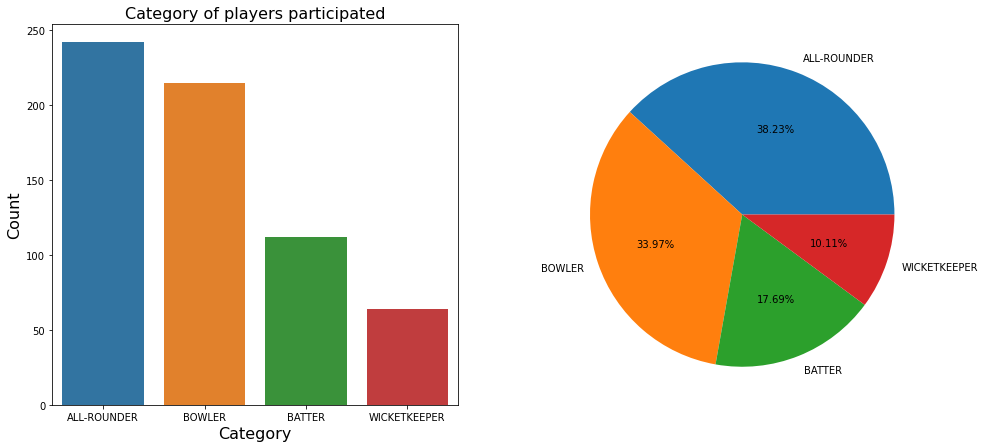

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


In [22]:
#plotting types of players

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(x = category.index, y = category)
plt.title("Category of players participated",fontsize = 16)
plt.xlabel("Category",fontsize = 16)
plt.ylabel("Count",fontsize = 16)

plt.subplot(1,2,2)
plt.pie(category.values,labels=category.index,autopct="%1.2f%%")
plt.show()

category.reset_index()

**Most All rounder type players participated in IPL2022 Auction.**

In [23]:
# To check % wise type of player sold in IPL Auction
WICKETKEEPER_SOLD=ipl[(ipl["TYPE"]=="WICKETKEEPER")& (ipl["status"]=="sold")].reset_index()
WICKETKEEPER_SOLD["TYPE"].value_counts()

TotalWicketkeeper=ipl[(ipl["TYPE"]=="WICKETKEEPER")].reset_index()
TotalWicketkeeper["TYPE"].value_counts()

(WICKETKEEPER_SOLD["TYPE"].value_counts()/TotalWicketkeeper["TYPE"].value_counts()*100)

WICKETKEEPER    42.1875
Name: TYPE, dtype: float64

## Plotting Number of Players Sold and Unsold

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


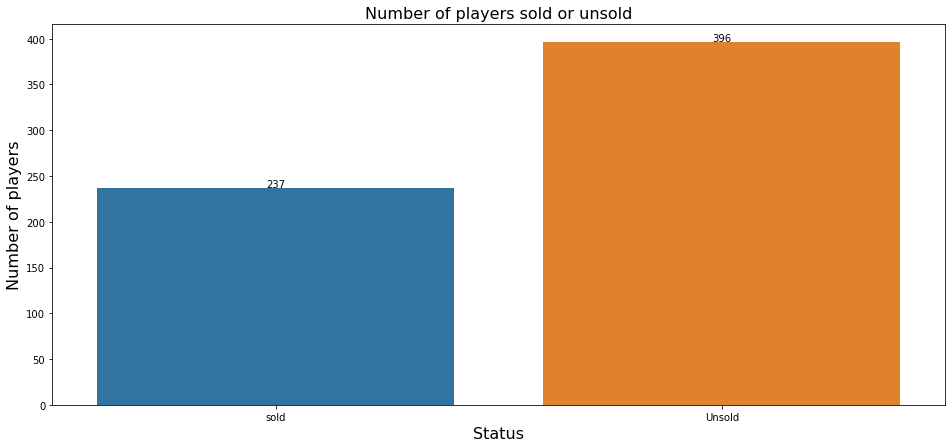

In [21]:
plt.figure(figsize=(16,7))
fig = sns.countplot(ipl["status"])
plt.title("Number of players sold or unsold",fontsize = 16)
plt.xlabel("Status",fontsize = 16)
plt.ylabel("Number of players",fontsize = 16)

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()

**237 players are sold and 396 players are unsold.**

## Number of players bought by each team.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


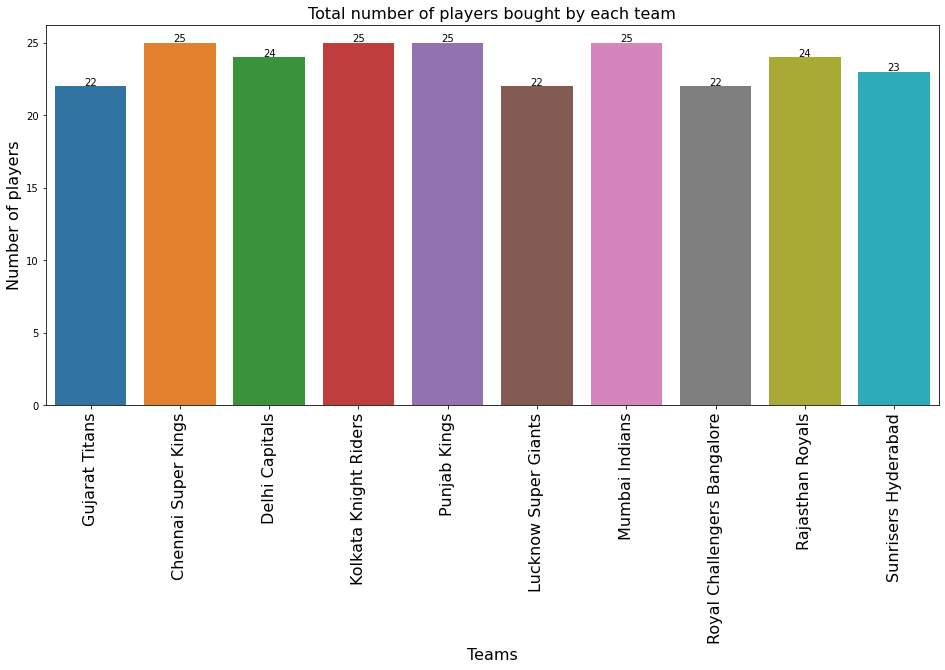

In [22]:
#Total number of players bought by each team

plt.figure(figsize=(16,7))
fig = sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"])
plt.title("Total number of players bought by each team",fontsize = 16)
plt.xticks(rotation= 90,fontsize = 16)
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of players",fontsize = 16)

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()

**CSK, KKR, PK and MI bought the 25 players which is maximum limit for a team and GT, LSG and RCB bought 22 players.**

## Checking Teams strategy of retained players and players bought from auction.

In [26]:
#Creating new column 
ipl["retention"]=ipl["Base Price"]

In [27]:
#Checking unique elements in Base Price column
ipl["Base Price"].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [28]:
#Replacing amount of money with  "From Auction"
ipl["retention"].replace([ '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', '1.5 Cr'], "From Auction", inplace=True)

In [29]:
# treating base price column 
#changing draft pick with 0
ipl["Base Price"].replace("Draft Pick",0,inplace=True)

In [30]:
#To check how we can splits the element
[ipl["Base Price"].head()]

[0          0
 1          0
 2       2 Cr
 3    40 Lakh
 4          0
 Name: Base Price, dtype: object]

In [31]:
#Creating new columns
#it will have unit "Cr or lakh"
ipl["base_price_unit"]=ipl["Base Price"].apply(lambda x: str(x).split(" ")[-1])

#it will have values
ipl["base_price"]=ipl["Base Price"].apply(lambda x: str(x).split(" ")[0])

In [32]:
ipl["base_price"].replace("Retained",0, inplace=True)

In [33]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [34]:
ipl["retention"].unique()

array(['Draft Pick', 'From Auction', 'Retained'], dtype=object)

In [38]:
#Total player bought and retained

ipl.groupby(["Team","retention"])["retention"].count()[:-1] #[:-1] to remove Unsold players

Team                         retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

# To find which team bought which category players

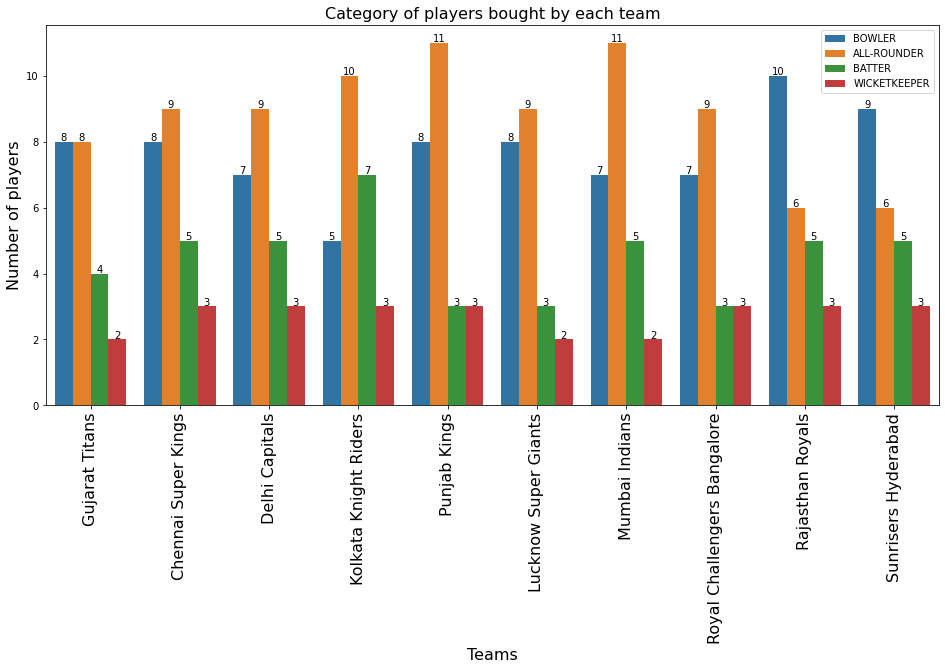

In [41]:
#plotting which team bought which category players

plt.figure(figsize=(16,7))
fig = sns.countplot(ipl[ipl["Team"]!="Unsold"]["Team"], hue=ipl["TYPE"])
plt.title("Category of players bought by each team",fontsize = 16)
plt.xticks(rotation= 90,fontsize = 16)
plt.xlabel("Teams",fontsize = 16)
plt.ylabel("Number of players",fontsize = 16)
plt.legend(loc=0)
#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()

**PK and MI bought 11 All-rounders.**

**Rajasthan royal bought 10 bowler which is maximum by any team.**

**RCB and PK have 3 batters according to category.**

**All the teams buy 2 to 3 wicketkeepers in their squad.**

## Highest amount spent on a player buy a team in Auction

In [39]:
# Highest amount spent on a player
ipl[ipl["retention"]=="From Auction"].groupby(["Team"])["COST IN ₹ (CR.)"].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Sunrisers Hyderabad            10.75
Royal Challengers Bangalore    10.75
Delhi Capitals                 10.75
Rajasthan Royals               10.00
Lucknow Super Giants           10.00
Gujarat Titans                 10.00
Name: COST IN ₹ (CR.), dtype: float64

**Mumbai Indians spent maximum amount of 15.25Cr for a player.**

## Checking the most expensive players from Auction

In [53]:
Expensiveplayers=pd.DataFrame(ipl[ipl["retention"]=="From Auction"].groupby(["Team","Player"])["COST IN ₹ (CR.)"].max()[:-1].sort_values(ascending=False))
Expensiveplayers.head()

,,COST IN ₹ (CR.)
Team,Player,
Mumbai Indians,Ishan Kishan,15.25
Chennai Super Kings,Deepak Chahar,14.00
Kolkata Knight Riders,Shreyas Iyer,12.25
Punjab Kings,Liam Livingstone,11.50
Sunrisers Hyderabad,Nicholas Pooran,10.75


**Ishan Kishan is most expensive player of IPL 2022 auction.**

## Players retained by a team at maximum amount (16 cr)

In [42]:
#Player retained at maximum price
ipl[ipl["retention"]=="Retained"].sort_values(by="COST IN ₹ (CR.)",ascending=False).head(10)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,Retained,0
47,Rishabh Pant,Retained,WICKETKEEPER,16.0,2080.0,DC,Delhi Capitals,sold,Retained,Retained,0
143,Rohit Sharma,Retained,BATTER,16.0,2080.0,MI,Mumbai Indians,sold,Retained,Retained,0
168,Virat Kohli,Retained,BATTER,15.0,1950.0,RCB,Royal Challengers Bangalore,sold,Retained,Retained,0
214,Kane Williamson,Retained,BATTER,14.0,1820.0,SRH,Sunrisers Hyderabad,sold,Retained,Retained,0
190,Sanju Samson,Retained,WICKETKEEPER,14.0,1820.0,RR,Rajasthan Royals,sold,Retained,Retained,0
145,Jasprit Bumrah,Retained,BOWLER,12.0,1560.0,MI,Mumbai Indians,sold,Retained,Retained,0
24,MS Dhoni,Retained,WICKETKEEPER,12.0,1560.0,CSK,Chennai Super Kings,sold,Retained,Retained,0
96,Mayank Agarwal,Retained,BATTER,12.0,1560.0,PBKS,Punjab Kings,sold,Retained,Retained,0
72,Andre Russell,Retained,ALL-ROUNDER,12.0,1560.0,KKR,Kolkata Knight Riders,sold,Retained,Retained,0


**Ravindra Jadeja, Rishabh Pant and Rohit Sharma are retained at maximum price by their respective teams.**

# Top 5 Expensive Bowlers 

In [43]:
#Top 5 Bowler

ipl[(ipl["retention"]=="From Auction") & (ipl["TYPE"]=="BOWLER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,Lakh,20


**Deepak Chahar is the most expensive bowler in IPL2022 auction bought by CSK at 14 crores price.**

# Top 5 Expensive All-Rounders

In [44]:
#Top 5 All rounder

ipl[(ipl["retention"]=="From Auction") & (ipl["TYPE"]=="ALL-ROUNDER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,sold,From Auction,Cr,1
170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,1
171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore,sold,From Auction,Cr,2
99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,sold,From Auction,Lakh,40
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,sold,From Auction,Lakh,40


**Liam Livingstone is the most expensive All-rounder in IPL2022 auction bought by Punjab Kings at 11.50 crores price.**

# Top 5 Expensive Batter

In [45]:
#Top 5 Batter

ipl[(ipl["retention"]=="From Auction") & (ipl["TYPE"]=="BATTER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,sold,From Auction,Cr,2
193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals,sold,From Auction,Cr,1.5
217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad,sold,From Auction,Lakh,40
100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,sold,From Auction,Cr,2
195,Devdutt Padikkal,2 Cr,BATTER,7.75,1007.5,RCB,Rajasthan Royals,sold,From Auction,Cr,2


**Shreyas Iyer is the most expensive Batter in IPL2022 auction bought by Kolkata Knight Riders at 11.50 crores price.**

# T0p 5 Expensive Wicketkeeper

In [46]:
#Top 5 Wicketkeeper

ipl[(ipl["retention"]=="From Auction") & (ipl["TYPE"]=="WICKETKEEPER")].sort_values(by="COST IN ₹ (CR.)",ascending=False).head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,sold,From Auction,Cr,2
215,Nicholas Pooran,1.5 Cr,WICKETKEEPER,10.75,1397.5,PBKS,Sunrisers Hyderabad,sold,From Auction,Cr,1.5
127,Quinton De Kock,2 Cr,WICKETKEEPER,6.75,877.5,MI,Lucknow Super Giants,sold,From Auction,Cr,2
26,Ambati Rayudu,2 Cr,WICKETKEEPER,6.75,877.5,CSK,Chennai Super Kings,sold,From Auction,Cr,2
101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,877.5,SRH,Punjab Kings,sold,From Auction,Cr,1.5


**Ishan Kishan is the most expensive Wicketkeeper in IPL2022 auction bought by Mumbai Indians at 15.25 crores price.**

# List of Unsold Players which are part of teams in IPL2021

In [47]:
#UNSOLD PLAYERS
UNSOLD_PLAYERS=ipl[(ipl["2021 Squad"] != "Not buyed/not participated") & (ipl["Team"]=="Unsold")][["Player","2021 Squad"]]
UNSOLD_PLAYERS

,Player,2021 Squad
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB


## To find the whole squad of team from IPL auction 2022

In [48]:
ipl.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team', 'status', 'retention', 'base_price_unit',
       'base_price'],
      dtype='object')

In [49]:
ipl["Team"].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [52]:
#Checking the squad of Mumbai INdians team from IPL Auction 2022
ipl[(ipl["Team"]=="Mumbai Indians") & (ipl["Player"])]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians,sold,Retained,Retained,0
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,sold,From Auction,Cr,2
145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians,sold,Retained,Retained,0
146,Tim David,40 Lakh,ALL-ROUNDER,8.25,1072.5,RCB,Mumbai Indians,sold,From Auction,Lakh,40
147,Jofra Archer,2 Cr,ALL-ROUNDER,8.00,1040.0,RR,Mumbai Indians,sold,From Auction,Cr,2
148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians,sold,Retained,Retained,0
149,Kieron Pollard,Retained,ALL-ROUNDER,6.00,780.0,MI,Mumbai Indians,sold,Retained,Retained,0
150,Dewald Brevis,20 Lakh,BATTER,3.00,390.0,Not buyed/not participated,Mumbai Indians,sold,From Auction,Lakh,20
151,Daniel Sams,1 Cr,ALL-ROUNDER,2.60,338.0,RCB,Mumbai Indians,sold,From Auction,Cr,1
152,N. Tilak Varma,20 Lakh,ALL-ROUNDER,1.70,221.0,Not buyed/not participated,Mumbai Indians,sold,From Auction,Lakh,20


ipl[(ipl["Team"]=="Mumbai Indians") & (ipl["Player"])]

**Just by changing the team name you can find the entire team squad of IPL 2022.**

# To find players which are part of the same team in IPL2021 and IPL2022.

In [55]:
ipl["Team"].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [56]:
ipl["2021 Squad"].unique()

array(['SRH', 'MI', 'KKR', 'RR', 'PBKS', 'Not buyed/not participated',
       'CSK', 'DC', 'RCB'], dtype=object)

In [54]:
ipl[(ipl["Team"]=="Mumbai Indians") & (ipl["2021 Squad"]=="MI")]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians,sold,Retained,Retained,0
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,sold,From Auction,Cr,2
145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians,sold,Retained,Retained,0
148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians,sold,Retained,Retained,0
149,Kieron Pollard,Retained,ALL-ROUNDER,6.00,780.0,MI,Mumbai Indians,sold,Retained,Retained,0
160,Arjun Tendulkar,20 Lakh,ALL-ROUNDER,0.30,39.0,MI,Mumbai Indians,sold,From Auction,Lakh,20
162,Anmolpreet Singh,20 Lakh,BATTER,0.20,26.0,MI,Mumbai Indians,sold,From Auction,Lakh,20


# Total amount spent by teams in IPL2022 

In [53]:
#Total amount spent in IPL
ipl["COST IN ₹ (CR.)"].sum()

875.9000000000001

**Total amount spent by all teams in IPL2022 in auction is 875.90crores.**

# Amount spent by each team in IPL 2022 Auction

In [57]:
# Amount spend by teams in auctiaon
ipl.groupby("Team").sum()["COST IN ₹ (CR.)"][:-1] #to remove Unsold

Team
Chennai Super Kings            87.05
Delhi Capitals                 86.40
Gujarat Titans                 89.65
Kolkata Knight Riders          81.55
Lucknow Super Giants           89.40
Mumbai Indians                 89.90
Punjab Kings                   84.55
Rajasthan Royals               89.05
Royal Challengers Bangalore    88.45
Sunrisers Hyderabad            89.90
Name: COST IN ₹ (CR.), dtype: float64

**Most money spent in IPL2022 auction is by Mumbai Indians and Sunrisers Hyderabad is 89.90 crores.**

**Minimum money spent in IPL2022 auction is by Kolkata Knight Riders is 81.55 crores.** 

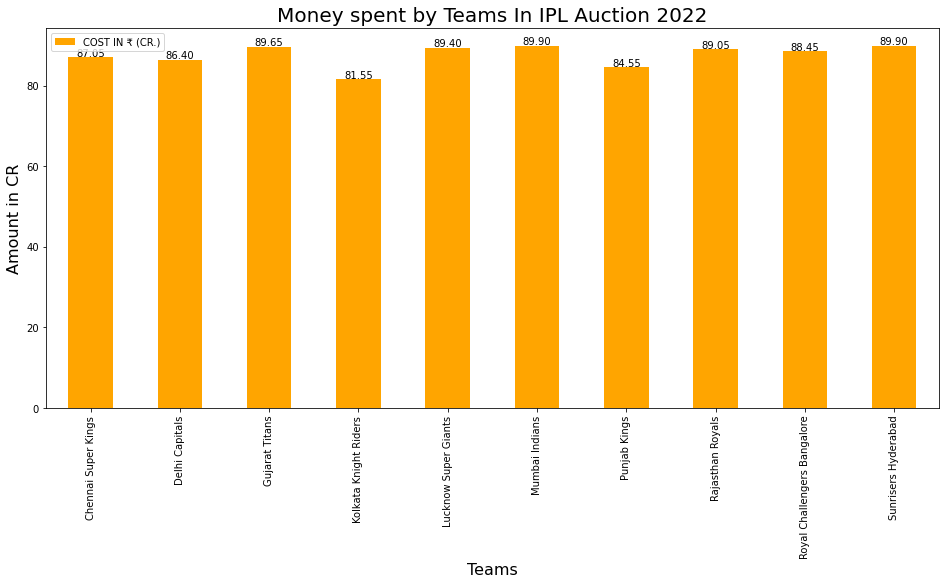

In [67]:
teamspend=ipl.groupby("Team").sum()["COST IN ₹ (CR.)"][:-1]

#Plotting 
plt.figure(figsize=(16,7))
fig=teamspend.plot(kind="bar", color="orange")

plt.title('Money spent by Teams In IPL Auction 2022', fontsize = 20)
plt.xlabel('Teams', fontsize= 16)
plt.ylabel('Amount in CR', fontsize = 16)
plt.legend(loc=2)

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".2f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()
plt.show()

# Observations

	Total 633 player participated in IPL 2022 auction.

	Following are the types of players participated in the IPL 2022 Auction
		
        1.	ALL-ROUNDER=242
		
        2.	BOWLER=215
		
        3.	BATTER=112
		
        4.	WICKETKEEPER=64


	Most All-rounder type players participated in IPL2022 Auction.

	237 players are sold and 396 players are unsold.

	Number of players bought by each team.

	CSK, KKR, PK and MI bought the 25 players which is maximum limit for a team and GT, LSG and RCB bought 22 players.

	Checking Teams strategy of retained players and players bought from auction.

	PK and MI bought 11 All-rounders.

	Rajasthan royal bought 10 bowler which is maximum by any team.

	RCB and PK have 3 batters according to category.

	All the teams buy 2 to 3 wicketkeepers in their squad.

	Mumbai Indians spent maximum amount of 15.25Cr for a player.

	Ishan Kishan is most expensive player of IPL 2022 auction.

	Ravindra Jadeja, Rishabh Pant and Rohit Sharma are retained at maximum price by their respective teams.

	Deepak Chahar is the most expensive bowler in IPL2022 auction bought by CSK at 14 crores price.

	Liam Livingstone is the most expensive All-rounder in IPL2022 auction bought by Punjab Kings at 11.50 crores price.

	Shreyas Iyer is the most expensive Batter in IPL2022 auction bought by Kolkata Knight Riders at 11.50 crores price.

	Ishan Kishan is the most expensive Wicketkeeper in IPL2022 auction bought by Mumbai Indians at 15.25 crores price.

	Total amount spent by all teams in IPL2022 in auction is 875.90crores.

	Most money spent in IPL2022 auction is by Mumbai Indians and Sunrisers Hyderabad is 89.90 crores.

	Minimum money spent in IPL2022 auction is by Kolkata Knight Riders is 81.55 crores.

